# Imports

In [1]:
import ipydeps

ipydeps.pip([
    'pandas',
    'numpy',
    'tensorflow',
    'xgboost', 
    'scikit-learn',
    'matplotlib',
    'tqdm'
])

import pandas as pd
import numpy as np
import tensorflow as tf
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import sklearn
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.neighbors
import sklearn.svm

import tensorflow.keras.models
import tensorflow.keras.layers
import tensorflow.keras.optimizers

import os, sys, collections, math, itertools, multiprocessing, ipywidgets, json, math

C:\Users\kaleb\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kaleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\kaleb\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load and Clean Data

Shroom Dataset: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset?select=mushroom_cleaned.csv \
Heart Dataset: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

In [2]:
# load
df_shroom = pd.read_csv('data/mushrooms/mushroom_cleaned.csv')
df_heart = pd.read_csv('data/heart_disease/heart_statlog_cleveland_hungary_final.csv')

# split dummy vars
df_shroom = pd.get_dummies(df_shroom, columns=['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']).astype(int)
df_heart = pd.get_dummies(df_heart, columns=['chest pain type', 'resting ecg', 'ST slope']).astype(int)

# EDA

In [3]:
df_shroom.shape, df_heart.shape

((54035, 47), (1190, 20))

In [4]:
df_shroom.head()

,cap-diameter,stem-height,stem-width,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,...,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12,season_0.0273721330556057,season_0.8884502877862838,season_0.9431945538974952,season_1.804272708628173
0,1372,3,1545,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1461,3,1557,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1371,3,1566,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1261,3,1566,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1305,3,1464,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df_heart.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1,1,0,0,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1,1,0,0,0,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,1,0,0,0,1,0,0


# Split the Data into X and y

In [6]:
# split X and y in shroom dataset
y_shroom = df_shroom['class']
X_shroom = df_shroom.drop('class', axis=1)

# split X and y in heart dataset
y_heart = df_heart['target']
X_heart = df_heart.drop('target', axis=1)

In [7]:
def records_to_json(data, filename):
    with open(f'data/{filename}', 'w+') as file:
        json.dump(data, file)
    return f'Saved {filename} in data/!'

records_to_json([{'a':1, 'b':2}], 'test.json')

'Saved test.json in data/!'

# KNN

In [8]:
help(sklearn.neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

### KNN Experiments for First Dataset

In [14]:
# shroom split: 70% fit, 30% test
X_shroom_fit, X_shroom_test, y_shroom_fit, y_shroom_test = sklearn.model_selection.train_test_split(X_shroom, y_shroom, test_size=0.3, random_state=42)

# set up iterative testing
find_K = lambda df: list(range(1, int(math.sqrt(df.shape[0])), int(math.sqrt(df.shape[0]))//10))  # 10 steps, 1 to sqrt(N)
K = find_K(X_shroom_fit)
weights = ['uniform', 'distance']
metrics = ['manhattan', 'euclidean', 'cosine']
hyperparams = list(itertools.product(K, weights, metrics))  # Lots of combinations... too many? Let's see. 

X = X_shroom_fit.to_numpy()
y = y_shroom_fit.to_numpy()
X_test = X_shroom_test.to_numpy()
y_test = y_shroom_test.to_numpy()


# def train_test_KNN(hp, X=X, y=y, X_test=X_test, y_test=y_test):
#     # fit the model
#     model = sklearn.neighbors.KNeighborsClassifier(
#         n_neighbors = hp[0],
#         weights = hp[1],
#         metric = hp[2]
#     )
#     model.fit(X, y)
    
#     # train accuracy
#     preds = model.predict(X)
#     n_correct = sum([int(x==y) for x,y in zip(preds, y)])
#     train_accuracy = n_correct / len(y)
    
#     # test accuracy
#     preds = model.predict(X_test)
#     n_correct = sum([int(x==y) for x,y in zip(preds, y_test)])
#     test_accuracy = n_correct / len(y_test)
    
#     return {'k': hp[0], 'weighting': hp[1], 'metric':hp[2], 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}

# scores_shroom = [None] * len(hyperparams)
# for i, hp in tqdm(enumerate(hyperparams), total=len(hyperparams), desc='Testing All Hyperparameter Combos'):
#     scores_shroom[i] = train_test_KNN(hp)

# records_to_json(scores_shroom, 'mushroom_knn.json')

TypeError: float() argument must be a string or a number, not 'dict'

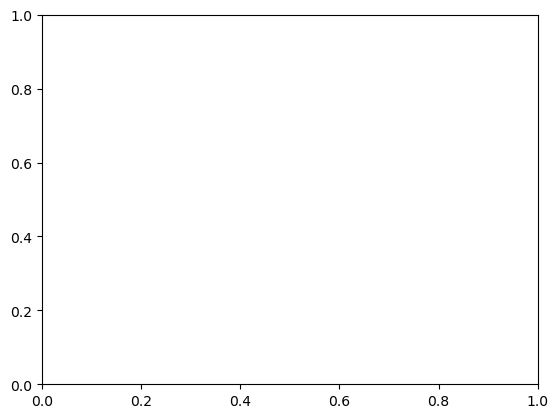

In [10]:
# for metric in metrics:
#     plt.plot(K, [scores_shroom[i] for i in range(len(scores_shroom)) if hyperparams[i][1]=='uniform' and hyperparams[i][2]==metric])
#     plt.title(f'Uniform Weight, {metric} Distance, Accuracy by K')
#     plt.show()
#     plt.plot(K, [scores_shroom[i] for i in range(len(scores_shroom)) if hyperparams[i][1]=='distance' and hyperparams[i][2]==metric])
#     plt.title(f'Distance-Weighted, {metric} Distance, Accuracy by K')
#     plt.show()

### KNN Experiments for Second Dataset

In [15]:
# shroom split: 70% fit, 30% test
X_heart_fit, X_heart_test, y_heart_fit, y_heart_test = sklearn.model_selection.train_test_split(X_heart, y_heart, test_size=0.3, random_state=42)

K = find_K(X_heart_fit)
hyperparams = list(itertools.product(K, weights, metrics)) 

X = X_heart_fit.to_numpy()
y = y_heart_fit.to_numpy()
X_test = X_heart_test.to_numpy()
y_test = y_heart_test.to_numpy()

# scores_heart = [None] * len(hyperparams)
# for i, hp in tqdm(enumerate(hyperparams), total=len(hyperparams), desc='Testing All Hyperparameter Combos'):
#     scores_heart[i] = train_test_KNN(hp)

# records_to_json(scores_heart, 'heart_knn.json')

In [24]:
# for metric in metrics:
#     plt.plot(K, [scores_heart[i] for i in range(len(scores_heart)) if hyperparams[i][1]=='uniform' and hyperparams[i][2]==metric])
#     plt.title(f'Uniform Weight, {metric} Distance, Accuracy by K')
#     plt.show()
#     plt.plot(K, [scores_heart[i] for i in range(len(scores_heart)) if hyperparams[i][1]=='distance' and hyperparams[i][2]==metric])
#     plt.title(f'Distance-Weighted, {metric} Distance, Accuracy by K')
#     plt.show()

# SVMs

NOTE: Switch to cross-validation

In [25]:
help(sklearn.svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

### First Dataset

In [29]:
X = X_shroom_fit.to_numpy()
y = y_shroom_fit.to_numpy()
X_test = X_shroom_test.to_numpy()
y_test = y_shroom_test.to_numpy()

# set up iterative testing
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = range(0, 6)  # 0 to 5
hyperparams_svc = list(itertools.product(kernels, degrees))
hyperparams_svc = [hp for hp in hyperparams_svc if hp[0]=='poly' or hp[1]==1.0]  # don't need multiple degrees for non-poly

# cross-validation was REALLY slow
def train_test_SVM(hp):
    model = sklearn.pipeline.make_pipeline(
        sklearn.preprocessing.StandardScaler(), 
        sklearn.svm.SVC(kernel=hp[0], degree=hp[1])
    )
    model.fit(X, y)
    
    # train accuracy
    preds = model.predict(X)
    n_correct = sum([int(x==y) for x,y in zip(preds, y)])
    train_accuracy = n_correct / len(y)
    
    # test accuracy
    preds = model.predict(X_test)
    n_correct = sum([int(x==y) for x,y in zip(preds, y_test)])
    test_accuracy = n_correct / len(y_test)
    
    return {'kernel': hp[0], 'degree':hp[1], 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}

scores_shroom_SVC = [None] * len(hyperparams_svc)
for i, hp in tqdm(enumerate(hyperparams_svc), total=len(hyperparams_svc), desc='Testing All Hyperparameter Combos'):
    scores_shroom_SVC[i] = train_test_SVM(hp)
    
records_to_json(scores_shroom_SVC, 'mushroom_svc.json')

Testing All Hyperparameter Combos:   0%|          | 0/9 [00:00<?, ?it/s]

'Saved mushroom_svc.json in data/!'

In [30]:
# for kernel in kernels:
#     if kernel=='poly':
#         for d in degrees:
#             data = [scores_shroom_SVC[i] for i in range(len(scores_shroom_SVC)) if hyperparams_SVC[1]==kernel and hyperparams_SVC[2]==d]
#             plt.plot(C, data)
#             plt.title(f'SVM Accuracy by C, Polynomial Kernel (Degree={d})')
#     else:
#         data = [scores_shroom_SVC[i] for i in range(len(scores_shroom_SVC)) if hyperparams_SVC[1]==kernel]
#         plt.plot(C, data)
#         plt.title(f'SVM Accuracy by C, {kernel} Kernel')
#         plt.show()

NameError: name 'hyperparams_SVC' is not defined

### Second Dataset

In [31]:
X = X_heart_fit.to_numpy()
y = y_heart_fit.to_numpy()
X_test = X_heart_test.to_numpy()
y_test = y_heart_test.to_numpy()

scores_heart_SVC = [None] * len(hyperparams_svc)
for i, hp in tqdm(enumerate(hyperparams_svc), total=len(hyperparams_svc), desc='Testing All Hyperparameter Combos'):
    scores_heart_SVC[i] = train_test_SVM(hp)
    
records_to_json(scores_heart_SVC, 'heart_svc.json')

Testing All Hyperparameter Combos:   0%|          | 0/9 [00:00<?, ?it/s]

'Saved heart_svc.json in data/!'

In [ ]:
# for kernel in kernels:
#     if kernel=='poly':
#         for d in degrees:
#             data = [scores_heart_SVC[i] for i in range(len(scores_heart_SVC)) if hyperparams_SVC[1]==kernel and hyperparams_SVC[2]==d]
#             plt.plot(C, data)
#             plt.title(f'SVM Accuracy by C, Polynomial Kernel (Degree={d})')
#     else:
#         data = [scores_heart_SVC[i] for i in range(len(scores_heart_SVC)) if hyperparams_SVC[1]==kernel]
#         plt.plot(C, data)
#         plt.title(f'SVM Accuracy by C, {kernel} Kernel')
#         plt.show()

# Neural Networks

In [16]:
help(tensorflow.keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

## Model 1

### Dataset 1

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5571 - loss: 1.4410 - val_accuracy: 0.5943 - val_loss: 0.7863
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6104 - loss: 0.6935 - val_accuracy: 0.6751 - val_loss: 0.6037
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6669 - loss: 0.6109 - val_accuracy: 0.7180 - val_loss: 0.5559
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6912 - loss: 0.5735 - val_accuracy: 0.6461 - val_loss: 0.5645
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7101 - loss: 0.5508 - val_accuracy: 0.7471 - val_loss: 0.5086
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5088 - val_accuracy: 0.7163 - val_loss: 0.5214
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7542 - loss: 0.4935 - val_accuracy: 0.7319 - val_loss: 0.4925
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7576 - loss: 0.4778 - val_accu

946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9365 - loss: 0.1432 - val_accuracy: 0.9478 - val_loss: 0.1245
Epoch 52/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9359 - loss: 0.1469 - val_accuracy: 0.9071 - val_loss: 0.2132
Epoch 53/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9360 - loss: 0.1497 - val_accuracy: 0.9397 - val_loss: 0.1382
Epoch 54/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9291 - loss: 0.1636 - val_accuracy: 0.9375 - val_loss: 0.1427
Epoch 55/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9399 - loss: 0.1420 - val_accuracy: 0.9436 - val_loss: 0.1310
Epoch 56/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9417 - loss: 0.1371 - val_accuracy: 0.9558 - val_loss: 0.1069
Epoch 57/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9433 - loss: 0.1304 - val_accuracy: 0.9565 - val_loss: 0.1035
Epoch 58/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9450 - loss: 0.1287 - val_accuracy:

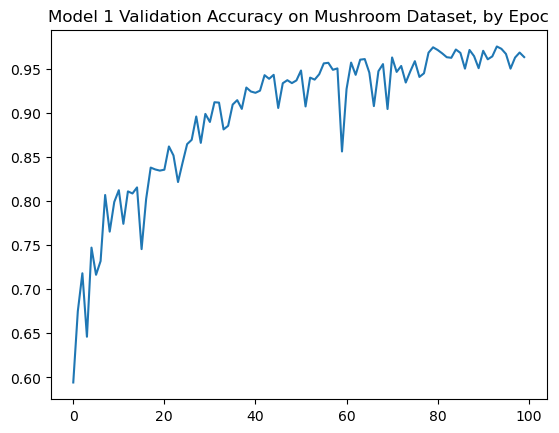

'Saved mushroom_nn1.json in data/!'

In [17]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_shroom.shape[1], input_shape=(X_shroom.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

shroom_history_1 = model.fit(
    x=X_shroom_fit.to_numpy(),
    y=y_shroom_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(shroom_history_1.history['val_accuracy'])
plt.title("Model 1 Validation Accuracy on Mushroom Dataset, by Epoc")
plt.show()

records_to_json(shroom_history_1.history, 'mushroom_nn1.json')

### Dataset 2

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4857 - loss: 6.7047 - val_accuracy: 0.6048 - val_loss: 0.7481
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6230 - loss: 0.7650 - val_accuracy: 0.7066 - val_loss: 0.6064
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 0.6624 - val_accuracy: 0.7305 - val_loss: 0.5653
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7184 - loss: 0.5911 - val_accuracy: 0.7186 - val_loss: 0.5603
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7545 - loss: 0.5485 - val_accuracy: 0.7066 - val_loss: 0.5613
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7309 - loss: 0.5426 - val_accuracy: 0.7425 - val_loss: 0.5598
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.5561 - val_accuracy: 0.7126 - val_loss: 0.5914
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7565 - loss: 0.5196 - val_accuracy: 0.7066 - 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8498 - loss: 0.3562 - val_accuracy: 0.7904 - val_loss: 0.4768
Epoch 52/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8369 - loss: 0.3754 - val_accuracy: 0.7784 - val_loss: 0.5021
Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8135 - loss: 0.3895 - val_accuracy: 0.7605 - val_loss: 0.5174
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8472 - loss: 0.3785 - val_accuracy: 0.7964 - val_loss: 0.4804
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8521 - loss: 0.3598 - val_accuracy: 0.7545 - val_loss: 0.4910
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8497 - loss: 0.3706 - val_accuracy: 0.7964 - val_loss: 0.4682
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 0.3861 - val_accuracy: 0.7904 - val_loss: 0.4681
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8508 - loss: 0.3379 - val_accuracy: 0.7665 - val_

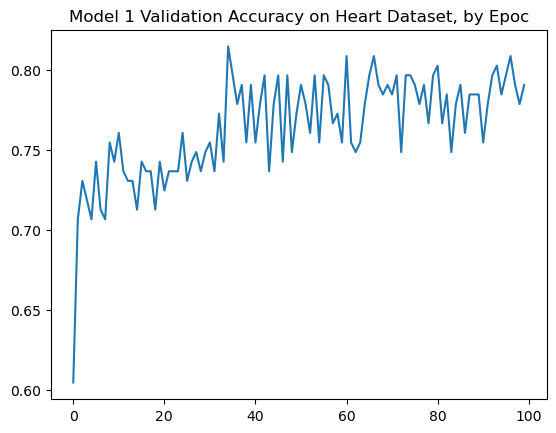

'Saved heart_nn1.json in data/!'

In [18]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_heart.shape[1], input_shape=(X_heart.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

heart_history_1 = model.fit(
    x=X_heart_fit.to_numpy(),
    y=y_heart_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(heart_history_1.history['val_accuracy'])
plt.title("Model 1 Validation Accuracy on Heart Dataset, by Epoc")
plt.show()

records_to_json(heart_history_1.history, 'heart_nn1.json')

## Model 2

Shrink hidden dense layers on each iteration. 

### Dataset 1

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5587 - loss: 1.5864 - val_accuracy: 0.6391 - val_loss: 0.7617
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6215 - loss: 0.9055 - val_accuracy: 0.6673 - val_loss: 0.7010
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6491 - loss: 0.7356 - val_accuracy: 0.7262 - val_loss: 0.5521
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6632 - loss: 0.6756 - val_accuracy: 0.5716 - val_loss: 0.8603
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6773 - loss: 0.6275 - val_accuracy: 0.6739 - val_loss: 0.6577
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6837 - loss: 0.5981 - val_accuracy: 0.7114 - val_loss: 0.5590
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7026 - loss: 0.5680 - val_accuracy: 0.7584 - val_loss: 0.5170
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7023 - loss: 0.5830 - val_accu

946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9017 - loss: 0.2105 - val_accuracy: 0.9013 - val_loss: 0.2112
Epoch 52/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9078 - loss: 0.1993 - val_accuracy: 0.8613 - val_loss: 0.3084
Epoch 53/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2214 - val_accuracy: 0.8726 - val_loss: 0.2696
Epoch 54/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9089 - loss: 0.2012 - val_accuracy: 0.9138 - val_loss: 0.2008
Epoch 55/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9111 - loss: 0.1995 - val_accuracy: 0.9319 - val_loss: 0.1623
Epoch 56/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9189 - loss: 0.1851 - val_accuracy: 0.9216 - val_loss: 0.1879
Epoch 57/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9190 - loss: 0.1790 - val_accuracy: 0.8797 - val_loss: 0.2531
Epoch 58/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9165 - loss: 0.1818 - val_accuracy:

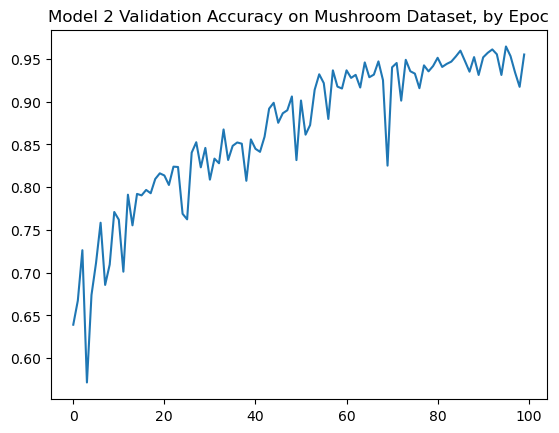

'Saved mushroom_nn2.json in data/!'

In [19]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_shroom.shape[1], input_shape=(X_shroom.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_shroom.shape[1]//2, activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_shroom.shape[1]//4, activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

shroom_history_2 = model.fit(
    x=X_shroom_fit.to_numpy(),
    y=y_shroom_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(shroom_history_2.history['val_accuracy'])
plt.title("Model 2 Validation Accuracy on Mushroom Dataset, by Epoc")
plt.show()

records_to_json(shroom_history_2.history, 'mushroom_nn2.json')

### Dataset 2

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4990 - loss: 17.2875 - val_accuracy: 0.5150 - val_loss: 6.1348
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5040 - loss: 4.4254 - val_accuracy: 0.5629 - val_loss: 0.8083
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5696 - loss: 0.8795 - val_accuracy: 0.5808 - val_loss: 0.6725
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 0.6648 - val_accuracy: 0.6287 - val_loss: 0.6252
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6490 - loss: 0.6140 - val_accuracy: 0.6587 - val_loss: 0.6103
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6877 - loss: 0.5997 - val_accuracy: 0.6946 - val_loss: 0.6008
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.5883 - val_accuracy: 0.7006 - val_loss: 0.5915
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.5727 - val_accuracy: 0.7126 -

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4314 - val_accuracy: 0.7844 - val_loss: 0.4736
Epoch 52/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.4304 - val_accuracy: 0.7725 - val_loss: 0.4982
Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4238 - val_accuracy: 0.8024 - val_loss: 0.4693
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.4167 - val_accuracy: 0.8024 - val_loss: 0.4712
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8306 - loss: 0.3911 - val_accuracy: 0.7665 - val_loss: 0.4899
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8102 - loss: 0.4399 - val_accuracy: 0.7904 - val_loss: 0.4689
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4006 - val_accuracy: 0.7964 - val_loss: 0.4681
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.4011 - val_accuracy: 0.7904 - val_lo

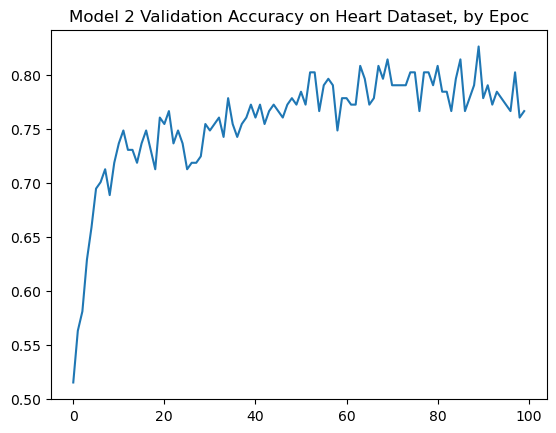

'Saved heart_nn2.json in data/!'

In [20]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_heart.shape[1], input_shape=(X_heart.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_heart.shape[1]//2, activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_heart.shape[1]//4, activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

heart_history_2 = model.fit(
    x=X_heart_fit.to_numpy(),
    y=y_heart_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(heart_history_2.history['val_accuracy'])
plt.title("Model 2 Validation Accuracy on Heart Dataset, by Epoc")
plt.show()

records_to_json(heart_history_2.history, 'heart_nn2.json')

## Model 3

More Layers! Not shrinking this time... looks like it didn't help. 

### Dataset 1

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5592 - loss: 0.9628 - val_accuracy: 0.5491 - val_loss: 0.8267
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5961 - loss: 0.6685 - val_accuracy: 0.5856 - val_loss: 0.6542
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5912 - loss: 0.6610 - val_accuracy: 0.6181 - val_loss: 0.6442
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5910 - loss: 0.6631 - val_accuracy: 0.5989 - val_loss: 0.6581
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5903 - loss: 0.6494 - val_accuracy: 0.5919 - val_loss: 0.6454
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5922 - loss: 0.6365 - val_accuracy: 0.6884 - val_loss: 0.5663
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6276 - loss: 0.6177 - val_accuracy: 0.6423 - val_loss: 0.6032
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6797 - loss: 0.5604 - val_accu

946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9523 - loss: 0.1209 - val_accuracy: 0.9537 - val_loss: 0.1163
Epoch 52/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9448 - loss: 0.1362 - val_accuracy: 0.9455 - val_loss: 0.1254
Epoch 53/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9125 - loss: 0.2152 - val_accuracy: 0.9451 - val_loss: 0.1339
Epoch 54/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9430 - loss: 0.1376 - val_accuracy: 0.9383 - val_loss: 0.1466
Epoch 55/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9322 - loss: 0.1663 - val_accuracy: 0.9465 - val_loss: 0.1244
Epoch 56/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9431 - loss: 0.1389 - val_accuracy: 0.9539 - val_loss: 0.1094
Epoch 57/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9499 - loss: 0.1195 - val_accuracy: 0.9473 - val_loss: 0.1197
Epoch 58/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9522 - loss: 0.1198 - val_accuracy:

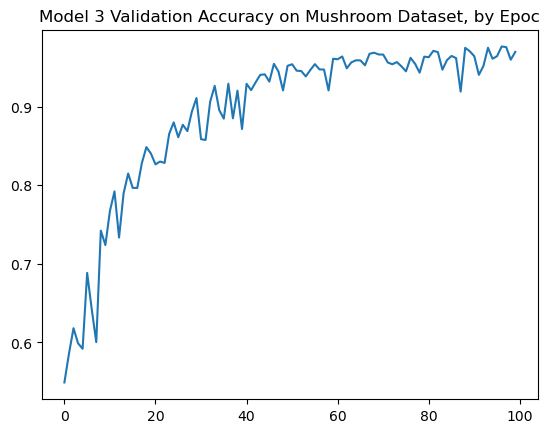

'Saved mushroom_nn3.json in data/!'

In [21]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_shroom.shape[1], input_shape=(X_shroom.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 4
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 5
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

shroom_history_3 = model.fit(
    x=X_shroom_fit.to_numpy(),
    y=y_shroom_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(shroom_history_3.history['val_accuracy'])
plt.title("Model 3 Validation Accuracy on Mushroom Dataset, by Epoc")
plt.show()

records_to_json(shroom_history_3.history, 'mushroom_nn3.json')

### Dataset 2

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5115 - loss: 0.7362 - val_accuracy: 0.6048 - val_loss: 0.6397
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6074 - loss: 0.6600 - val_accuracy: 0.6527 - val_loss: 0.6261
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.6081 - val_accuracy: 0.6287 - val_loss: 0.6230
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6775 - loss: 0.6007 - val_accuracy: 0.6108 - val_loss: 0.6375
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 0.6103 - val_accuracy: 0.6168 - val_loss: 0.6295
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6985 - loss: 0.5808 - val_accuracy: 0.6587 - val_loss: 0.6014
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.6026 - val_accuracy: 0.6647 - val_loss: 0.6042
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.5786 - val_accuracy: 0.6886 - 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8125 - loss: 0.3766 - val_accuracy: 0.7725 - val_loss: 0.4994
Epoch 52/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8396 - loss: 0.3318 - val_accuracy: 0.7725 - val_loss: 0.5009
Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.3623 - val_accuracy: 0.7545 - val_loss: 0.5139
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8538 - loss: 0.3059 - val_accuracy: 0.7665 - val_loss: 0.5279
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8242 - loss: 0.3485 - val_accuracy: 0.7485 - val_loss: 0.6057
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8441 - loss: 0.3224 - val_accuracy: 0.7725 - val_loss: 0.4957
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.3755 - val_accuracy: 0.7784 - val_loss: 0.4971
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.3993 - val_accuracy: 0.7605 - val_lo

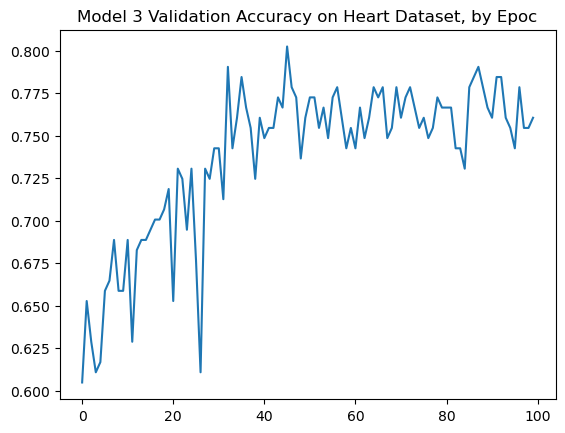

'Saved heart_nn3.json in data/!'

In [22]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_heart.shape[1], input_shape=(X_heart.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 4
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 5
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

heart_history_3 = model.fit(
    x=X_heart_fit.to_numpy(),
    y=y_heart_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(heart_history_3.history['val_accuracy'])
plt.title("Model 3 Validation Accuracy on Heart Dataset, by Epoc")
plt.show()

records_to_json(heart_history_3.history, 'heart_nn3.json')

## Model 4

Lower Learning Rate

### Dataset 1

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5647 - loss: 7.6013 - val_accuracy: 0.6196 - val_loss: 0.6671
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6112 - loss: 0.6722 - val_accuracy: 0.6369 - val_loss: 0.6683
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6189 - loss: 0.6635 - val_accuracy: 0.6262 - val_loss: 0.6428
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6371 - loss: 0.6442 - val_accuracy: 0.5823 - val_loss: 0.6406
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6557 - loss: 0.6222 - val_accuracy: 0.6497 - val_loss: 0.6156
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6546 - loss: 0.6147 - val_accuracy: 0.6448 - val_loss: 0.6017
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6667 - loss: 0.6075 - val_accuracy: 0.6790 - val_loss: 0.5995
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6808 - loss: 0.5900 - val_accu

946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8011 - loss: 0.4198 - val_accuracy: 0.8063 - val_loss: 0.4103
Epoch 52/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8034 - loss: 0.4187 - val_accuracy: 0.7896 - val_loss: 0.4323
Epoch 53/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8094 - loss: 0.4055 - val_accuracy: 0.7713 - val_loss: 0.4644
Epoch 54/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8072 - loss: 0.4075 - val_accuracy: 0.8059 - val_loss: 0.4097
Epoch 55/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8105 - loss: 0.4062 - val_accuracy: 0.8222 - val_loss: 0.3950
Epoch 56/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8072 - loss: 0.4098 - val_accuracy: 0.8103 - val_loss: 0.3864
Epoch 57/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8129 - loss: 0.3927 - val_accuracy: 0.8099 - val_loss: 0.3886
Epoch 58/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8157 - loss: 0.3944 - val_accuracy:

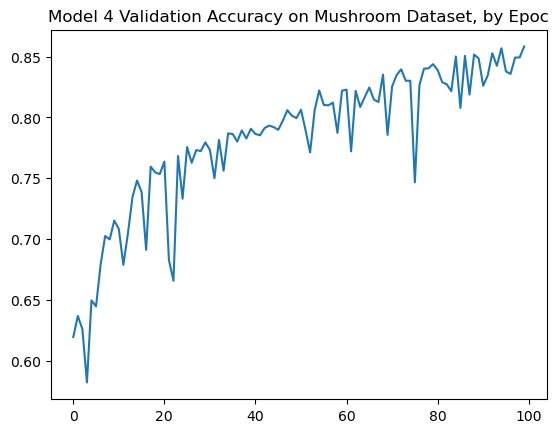

'Saved mushroom_nn4.json in data/!'

In [23]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_shroom.shape[1], input_shape=(X_shroom.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_shroom.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

shroom_history_4 = model.fit(
    x=X_shroom_fit.to_numpy(),
    y=y_shroom_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(shroom_history_4.history['val_accuracy'])
plt.title("Model 4 Validation Accuracy on Mushroom Dataset, by Epoc")
plt.show()

records_to_json(shroom_history_4.history, 'mushroom_nn4.json')

### Dataset 2

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5357 - loss: 2.8458 - val_accuracy: 0.5269 - val_loss: 1.6598
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 1.5960 - val_accuracy: 0.4611 - val_loss: 1.3852
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4593 - loss: 1.5182 - val_accuracy: 0.5030 - val_loss: 1.2249
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4739 - loss: 1.2994 - val_accuracy: 0.5030 - val_loss: 1.0983
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4995 - loss: 1.1143 - val_accuracy: 0.5090 - val_loss: 1.0065
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5211 - loss: 1.0687 - val_accuracy: 0.5868 - val_loss: 0.9306
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5865 - loss: 0.9379 - val_accuracy: 0.5749 - val_loss: 0.8681
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5875 - loss: 0.9255 - val_accuracy: 0.5629 - 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7011 - loss: 0.5664 - val_accuracy: 0.7066 - val_loss: 0.5883
Epoch 52/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 0.5851 - val_accuracy: 0.6707 - val_loss: 0.6037
Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 0.5474 - val_accuracy: 0.6766 - val_loss: 0.5995
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6951 - loss: 0.5921 - val_accuracy: 0.7066 - val_loss: 0.5876
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5410 - val_accuracy: 0.6826 - val_loss: 0.5951
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.5408 - val_accuracy: 0.6826 - val_loss: 0.5987
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.5742 - val_accuracy: 0.7126 - val_loss: 0.5853
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6908 - loss: 0.5848 - val_accuracy: 0.6946 - val_lo

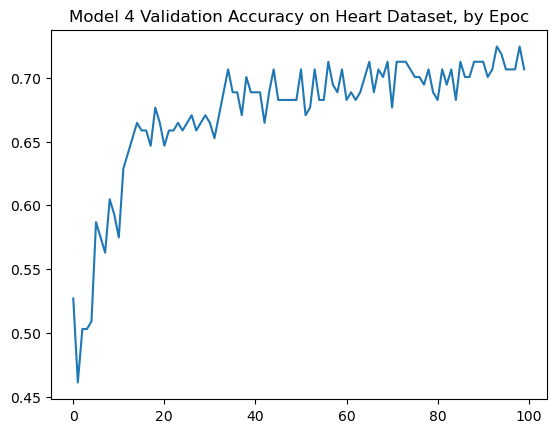

'Saved heart_nn4.json in data/!'

In [24]:
model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.layers.Dense(X_heart.shape[1], input_shape=(X_heart.shape[1],), activation='relu'),  # input
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 1
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 2
        tensorflow.keras.layers.Dense(X_heart.shape[1], activation='relu'),  # hidden 3
        tensorflow.keras.layers.Dense(1, activation='sigmoid')  # output
    ]
)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

heart_history_4 = model.fit(
    x=X_heart_fit.to_numpy(),
    y=y_heart_fit.to_numpy(),
    epochs=100,
    validation_split=0.2,
)

plt.plot(heart_history_4.history['val_accuracy'])
plt.title("Model 4 Validation Accuracy on Heart Dataset, by Epoc")
plt.show()

records_to_json(heart_history_4.history, 'heart_nn4.json')